# **Project Name**    - Brain Tumor MRI Image Classification
 


##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member  -** Bableen Kaur


# **Project Summary -**

This brain tumor classification project aimed to develop an intelligent, deep learning–based system to automatically classify brain MRI images into four categories: Glioma, Meningioma, Pituitary, and No Tumor. The motivation stems from the critical need for fast, accurate tumor diagnosis, which plays a key role in early treatment planning and improving patient outcomes. We began by understanding and exploring a labeled dataset sourced from Roboflow, which consisted of pre-segmented MRI scans. The preprocessing pipeline included resizing all images to 224x224 pixels, normalizing pixel values, and applying data augmentation techniques such as flipping, zooming, and rotation to reduce overfitting and improve model generalization. Our initial approach involved building a custom Convolutional Neural Network (CNN) from scratch. While this CNN achieved reasonable performance, it did not outperform the transfer learning models, which were subsequently explored. We tested three popular pretrained models: VGG16, ResNet50, and MobileNetV2, using the ImageNet weights as a base and adding custom classification heads. Each model was trained using the same generator pipelines, and their performance was evaluated on a separate test set using accuracy, confusion matrices, and classification reports. Among the models, MobileNetV2 clearly stood out, achieving the highest accuracy (around 86%) on the test data, whereas VGG16 gave moderate results (68%) and ResNet50 performed poorly (~64%), likely due to overfitting and increased depth without sufficient fine-tuning. Based on MobileNetV2’s performance, we proceeded with fine-tuning its top layers after initial training by unfreezing a few convolutional blocks, leading to a slight accuracy improvement and better feature learning. Once the best model was selected, we deployed it using Streamlit, a Python framework that enables easy creation of web applications. The Streamlit app allows users to upload a brain MRI image and receive real-time predictions regarding the tumor type, along with the associated confidence scores. This enhances accessibility for non-technical users and makes the model more practical for real-world usage. Additionally, the app was styled with clean UI practices, and deprecated warnings (such as replacing use_column_width with use_container_width) were resolved. Throughout the project, we also focused on interpretability by visualizing confusion matrices and accuracy/loss plots to understand the model’s behavior across classes and epochs. The final deployed model is lightweight, accurate, and fast, making it suitable for potential clinical applications or telemedicine platforms. This project not only demonstrates the effective application of deep learning and transfer learning in medical image classification but also highlights the importance of model comparison, fine-tuning, and real-world deployment.

# **GitHub Link -**

https://github.com/bableen123/BrainTumor

# **Problem Statement**


Early and accurate detection of brain tumors is critical for effective treatment and improved patient survival rates. However, manual diagnosis from MRI scans is time-consuming, prone to human error, and requires highly trained radiologists. Given the growing volume of medical imaging data, there is an urgent need for an automated, intelligent system that can classify brain tumors with high accuracy and speed. This project addresses the problem by developing a deep learning–based solution capable of automatically classifying brain MRI images into four categories — Glioma, Meningioma, Pituitary, and No Tumor — using convolutional neural networks (CNN) and pretrained transfer learning models. The ultimate goal is to enhance diagnostic support for medical professionals and improve decision-making in clinical environments.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [5]:
# Import Libraries
import zipfile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm


### Dataset Loading

In [7]:
# Load Dataset
zip_path = "tumour.zip"  
extract_dir = "tumour_data"

# Extract the zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


base_dir = os.path.join(extract_dir, "Tumour")
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
valid_dir = os.path.join(base_dir, "valid")
csv_train = os.path.join(train_dir, "_classes.csv")

print("Train subfolders:", os.listdir(train_dir))
print("Test subfolders:", os.listdir(test_dir))
print("Valid subfolders:", os.listdir(valid_dir))


Train subfolders: ['glioma', 'meningioma', 'no_tumor', 'pituitary', '_classes.csv']
Test subfolders: ['glioma', 'meningioma', 'no_tumor', 'pituitary', '_classes.csv']
Valid subfolders: ['glioma', 'meningioma', 'no_tumor', 'pituitary', '_classes.csv']


### Dataset First View

In [9]:
# Dataset First Look
import pandas as pd

df = pd.read_csv(csv_train)
df.head()



,filename,Glioma,Meningioma,No Tumor,Pituitary
0,Tr-pi_0164_jpg.rf.000776527ec0acdc89e31e15a352...,0,0,0,1
1,Tr-no_0426_jpg.rf.0026b06f369c5d51aca4c4c9beba...,0,0,1,0
2,Tr-gl_0496_jpg.rf.010620fbbbaa509aa81d7ce5bdf7...,1,0,0,0
3,Tr-gl_0554_jpg.rf.010a72c1c25cc9ce83c77fbb23db...,1,0,0,0
4,Tr-me_0185_jpg.rf.0094b0b539582e2f95ae7b6ada4d...,0,1,0,0


In [11]:
def get_label(row):
    classes = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]
    return classes[row[1:].values.argmax()]

df['label'] = df.apply(get_label, axis=1)
df.head()


,filename,Glioma,Meningioma,No Tumor,Pituitary,label
0,Tr-pi_0164_jpg.rf.000776527ec0acdc89e31e15a352...,0,0,0,1,Pituitary
1,Tr-no_0426_jpg.rf.0026b06f369c5d51aca4c4c9beba...,0,0,1,0,No Tumor
2,Tr-gl_0496_jpg.rf.010620fbbbaa509aa81d7ce5bdf7...,1,0,0,0,Glioma
3,Tr-gl_0554_jpg.rf.010a72c1c25cc9ce83c77fbb23db...,1,0,0,0,Glioma
4,Tr-me_0185_jpg.rf.0094b0b539582e2f95ae7b6ada4d...,0,1,0,0,Meningioma


### Dataset Rows & Columns count

In [16]:
# Dataset Rows & Columns count
print(f"Dataset shape: {df.shape}")  # (rows, columns)
print(f"Total rows: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")


Dataset shape: (1695, 6)
Total rows: 1695
Total columns: 6


### Dataset Information

In [19]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     1695 non-null   object
 1    Glioma      1695 non-null   int64 
 2    Meningioma  1695 non-null   int64 
 3    No Tumor    1695 non-null   int64 
 4    Pituitary   1695 non-null   int64 
 5   label        1695 non-null   object
dtypes: int64(4), object(2)
memory usage: 79.6+ KB


#### Duplicate Values

In [22]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [25]:
# Missing Values/Null Values Count
print("Missing/null values per column:")
print(df.isnull().sum())


Missing/null values per column:
filename       0
 Glioma        0
 Meningioma    0
 No Tumor      0
 Pituitary     0
label          0
dtype: int64


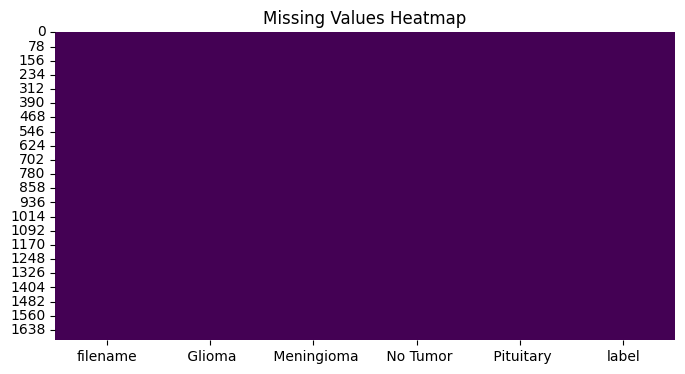

In [27]:
# Visualizing the missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


## ***2. Understanding Your Variables***

In [30]:
# Dataset Columns
print("Columns in the dataset:")
print(df.columns.tolist())


Columns in the dataset:
['filename', ' Glioma', ' Meningioma', ' No Tumor', ' Pituitary', 'label']


In [32]:
# Dataset Describe
display(df.describe())


,Glioma,Meningioma,No Tumor,Pituitary
count,1695.000000,1695.000000,1695.000000,1695.000000
mean,0.332743,0.211209,0.197640,0.258407
std,0.471335,0.408287,0.398337,0.437888
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


### Variables Description

Glioma:	1 if the image is of a Glioma tumor, else 0

Meningioma:	1 if the image is of a Meningioma tumor, else 0

No Tumor:	1 if the image has no tumor, else 0

Pituitary:	1 if the image is of a Pituitary tumor, else 0

##  ***Data Wrangling***

### Data Wrangling Code

In [38]:
#  Load and Analyze Class Distribution
from PIL import Image
from collections import Counter
from tqdm import tqdm

image_shapes = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    label_folder = row['label'].lower().replace(" ", "_")
    image_path = os.path.join(train_dir, label_folder, row['filename'])
    try:
        img = Image.open(image_path)
        image_shapes.append(img.size)
    except:
        print(f"Could not open {image_path}")

print("Most common image size:", Counter(image_shapes).most_common(1))


100%|█████████████████████████████████████████████████████████████████████████████| 1695/1695 [00:15<00:00, 110.41it/s]

Most common image size: [((640, 640), 1695)]


In [39]:
#Check Image Shape Consistency
#from PIL import Image
from collections import Counter
from tqdm import tqdm

image_shapes = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    label_folder = row['label'].lower().replace(" ", "_")
    image_path = os.path.join(train_dir, label_folder, row['filename'])
    try:
        img = Image.open(image_path)
        image_shapes.append(img.size)
    except:
        print(f"Could not open {image_path}")

print("Most common image size:", Counter(image_shapes).most_common(1))


100%|████████████████████████████████████████████████████████████████████████████| 1695/1695 [00:00<00:00, 3990.56it/s]

Most common image size: [((640, 640), 1695)]


##  ***Data Preprocessing***

In [40]:
#Preprocessing Setup (Resize + Normalize + Augment)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, "valid"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, "test"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


In [1]:
import tensorflow as tf
print(tf.__version__)


2.13.0


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

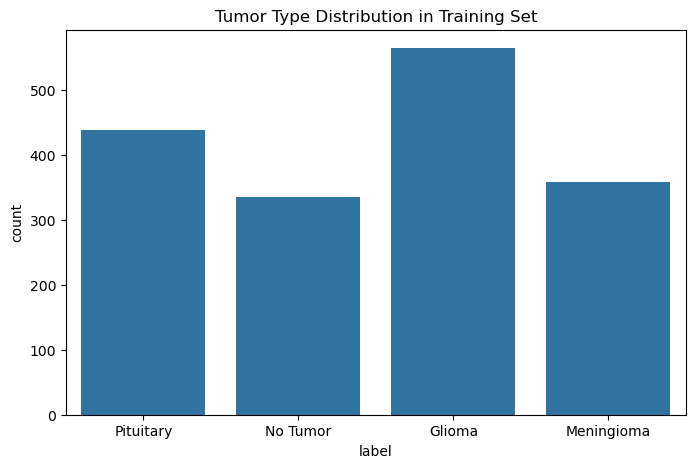

In [46]:
# Chart - 1 visualization code
# Plot class distribution
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=df)
plt.title("Tumor Type Distribution in Training Set")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## *** ML Model Implementation***

### ML Model - 1: CNN

In [41]:
# ML Model - CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define input shape based on your image resizing
input_shape = (224, 224, 3)  # 224x224 RGB images

model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [44]:
# Visualizing evaluation Metric Score chart
from tensorflow.keras.optimizers import Adam

model_cnn.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
#Setup Callbacks for Training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

checkpoint = ModelCheckpoint("best_cnn_model.h5", monitor='val_accuracy', save_best_only=True)


In [ ]:
#train model

In [60]:
history_cnn = model_cnn.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/10
53/53 [==============================] - ETA: 0s - loss: 1.2589 - accuracy: 0.4897

C:\Users\hp\anaconda3\envs\brain_mri\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


53/53 [==============================] - 106s 2s/step - loss: 1.2589 - accuracy: 0.4897 - val_loss: 7.7193 - val_accuracy: 0.3108
Epoch 2/10
53/53 [==============================] - 110s 2s/step - loss: 1.1610 - accuracy: 0.5174 - val_loss: 2.4720 - val_accuracy: 0.4582
Epoch 3/10
53/53 [==============================] - 110s 2s/step - loss: 1.3385 - accuracy: 0.4891 - val_loss: 1.1735 - val_accuracy: 0.4183
Epoch 4/10
53/53 [==============================] - 111s 2s/step - loss: 1.3405 - accuracy: 0.4844 - val_loss: 1.1660 - val_accuracy: 0.5657
Epoch 5/10
53/53 [==============================] - 110s 2s/step - loss: 1.1543 - accuracy: 0.5263 - val_loss: 1.0493 - val_accuracy: 0.5438
Epoch 6/10
53/53 [==============================] - 112s 2s/step - loss: 1.1148 - accuracy: 0.5428 - val_loss: 1.0845 - val_accuracy: 0.5876
Epoch 7/10
53/53 [==============================] - 236s 4s/step - loss: 1.1539 - accuracy: 0.5316 - val_loss: 0.8737 - val_accuracy: 0.6474
Epoch 8/10
53/53 [======

**Evaluate model**

8/8 [==============================] - 5s 652ms/step - loss: 0.7622 - accuracy: 0.6382
Test Accuracy: 0.64


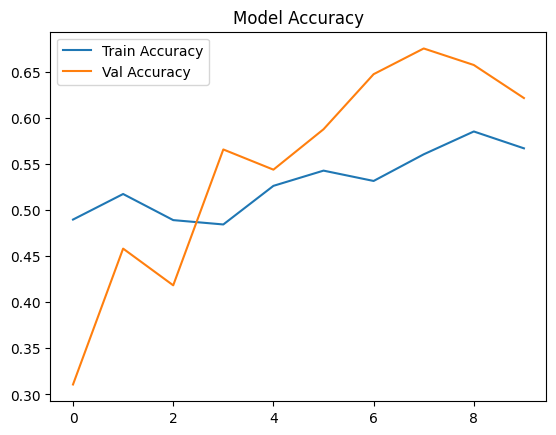

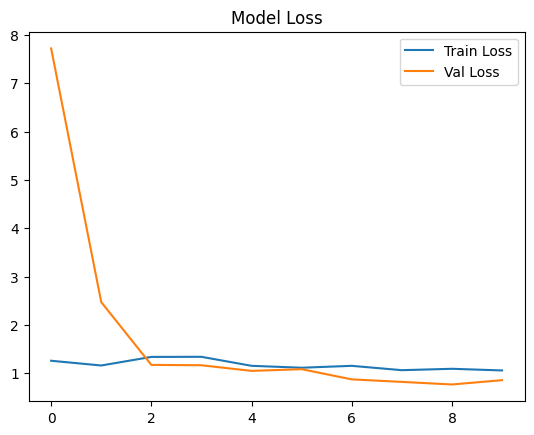

In [62]:
loss, acc = model_cnn.evaluate(test_generator)
print(f"Test Accuracy: {acc:.2f}")
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


### ML Model - 2: Transfer Learning (VGG16 Example)

In [67]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [69]:
#Load Pre-trained Base Model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the convolutional base

58889256/58889256 [==============================] - 5s 0us/step


In [71]:
#Build Transfer Learning Model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(4, activation='softmax')(x)  # 4 tumor classes

model_tl = Model(inputs=base_model.input, outputs=output)


In [73]:
#Compile the Model
model_tl.compile(optimizer=Adam(learning_rate=0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [80]:
# CALLBACKS
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model_tl.h5', save_best_only=True, monitor='val_loss', mode='min')

In [82]:
#Train the Model
history_tl = model_tl.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/10
53/53 [==============================] - 368s 7s/step - loss: 1.2963 - accuracy: 0.4336 - val_loss: 1.2402 - val_accuracy: 0.4382
Epoch 2/10


C:\Users\hp\anaconda3\envs\brain_mri\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


53/53 [==============================] - 343s 6s/step - loss: 1.2290 - accuracy: 0.4773 - val_loss: 1.1879 - val_accuracy: 0.5139
Epoch 3/10
53/53 [==============================] - 334s 6s/step - loss: 1.1771 - accuracy: 0.5162 - val_loss: 1.1453 - val_accuracy: 0.5498
Epoch 4/10
53/53 [==============================] - 356s 7s/step - loss: 1.1397 - accuracy: 0.5451 - val_loss: 1.1067 - val_accuracy: 0.5976
Epoch 5/10
53/53 [==============================] - 341s 6s/step - loss: 1.0954 - accuracy: 0.5611 - val_loss: 1.0749 - val_accuracy: 0.6036
Epoch 6/10
53/53 [==============================] - 332s 6s/step - loss: 1.0618 - accuracy: 0.5917 - val_loss: 1.0349 - val_accuracy: 0.6574
Epoch 7/10
53/53 [==============================] - 327s 6s/step - loss: 1.0262 - accuracy: 0.6159 - val_loss: 1.0052 - val_accuracy: 0.6653
Epoch 8/10
53/53 [==============================] - 328s 6s/step - loss: 1.0052 - accuracy: 0.6319 - val_loss: 0.9748 - val_accuracy: 0.6773
Epoch 9/10
53/53 [======

In [88]:
#Evaluate the Model
test_loss, test_acc = model_tl.evaluate(test_generator)
print(f"Test Accuracy (Transfer Learning): {test_acc:.2f}")

8/8 [==============================] - 34s 4s/step - loss: 0.9355 - accuracy: 0.6789
Test Accuracy (Transfer Learning): 0.68


In [96]:
# Get ground truth and predictions
y_true_vgg = test_generator.classes
y_pred_probs_vgg =model_tl.predict(test_generator)
y_pred_vgg = np.argmax(y_pred_probs_vgg, axis=1)

# Class labels
class_labels = list(test_generator.class_indices.keys())


8/8 [==============================] - 34s 4s/step


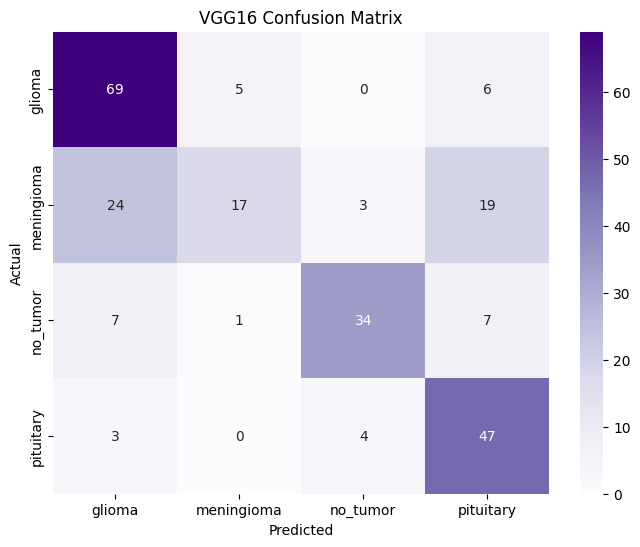

VGG16 Classification Report:
               precision    recall  f1-score   support

      glioma       0.67      0.86      0.75        80
  meningioma       0.74      0.27      0.40        63
    no_tumor       0.83      0.69      0.76        49
   pituitary       0.59      0.87      0.71        54

    accuracy                           0.68       246
   macro avg       0.71      0.67      0.65       246
weighted avg       0.70      0.68      0.65       246



In [98]:
#Confusion Matrix + Classification Report for VGG16
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm_vgg = confusion_matrix(y_true_vgg, y_pred_vgg)

plt.figure(figsize=(8,6))
sns.heatmap(cm_vgg, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('VGG16 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report_vgg = classification_report(y_true_vgg, y_pred_vgg, target_names=class_labels)
print("VGG16 Classification Report:\n", report_vgg)

In [100]:
# plot to vizualize training performance
import matplotlib.pyplot as plt

def plot_history(history, model_name='Model'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'{model_name} - Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'{model_name} - Loss')

    plt.show()


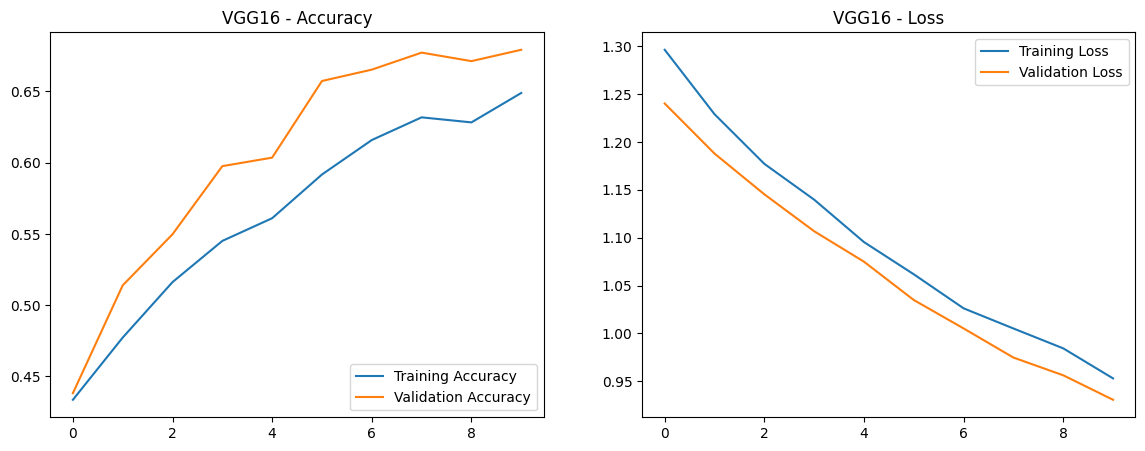

In [104]:
plot_history(history_tl, model_name='VGG16')


### ML Model - 3: MobileNetV2 Transfer Learning

In [108]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D

# Load base model
base_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_mobilenet.layers:
    layer.trainable = False

# Build custom head
x = base_mobilenet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(4, activation='softmax')(x)

model_mobilenet = Model(inputs=base_mobilenet.input, outputs=predictions)

# Compile
model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history_mobilenet = model_mobilenet.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop]
)

# Evaluate
test_loss, test_acc = model_mobilenet.evaluate(test_generator)
print("MobileNetV2 Test Accuracy:", round(test_acc, 4))


Epoch 1/10
53/53 [==============================] - 54s 976ms/step - loss: 0.7768 - accuracy: 0.7097 - val_loss: 0.6275 - val_accuracy: 0.7510
Epoch 2/10
53/53 [==============================] - 50s 948ms/step - loss: 0.4432 - accuracy: 0.8348 - val_loss: 0.5271 - val_accuracy: 0.7928
Epoch 3/10
53/53 [==============================] - 50s 942ms/step - loss: 0.3483 - accuracy: 0.8696 - val_loss: 0.5156 - val_accuracy: 0.8068
Epoch 4/10
53/53 [==============================] - 50s 936ms/step - loss: 0.3146 - accuracy: 0.8838 - val_loss: 0.5643 - val_accuracy: 0.7869
Epoch 5/10
53/53 [==============================] - 52s 989ms/step - loss: 0.2985 - accuracy: 0.8932 - val_loss: 0.4976 - val_accuracy: 0.8187
Epoch 6/10
53/53 [==============================] - 52s 982ms/step - loss: 0.2564 - accuracy: 0.9038 - val_loss: 0.4282 - val_accuracy: 0.8446
Epoch 7/10
53/53 [==============================] - 49s 929ms/step - loss: 0.2352 - accuracy: 0.9139 - val_loss: 0.3684 - val_accuracy: 0.8665

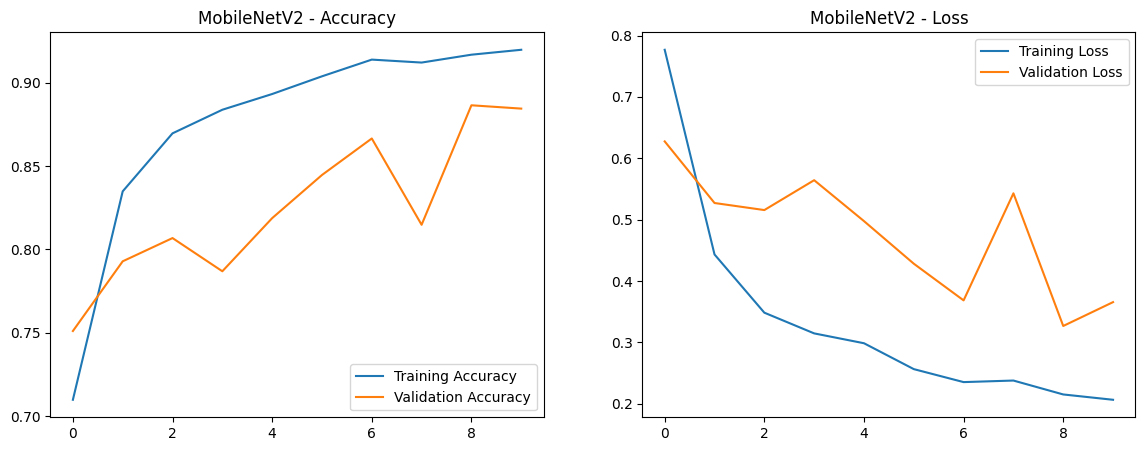

In [110]:
# plot
plot_history(history_mobilenet, model_name='MobileNetV2')

In [112]:
#Save the Trained Model
model_mobilenet.save("mobilenet_model.h5")

C:\Users\hp\anaconda3\envs\brain_mri\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [114]:
import numpy as np

# Get ground truth and predictions
y_true = test_generator.classes
y_pred_probs = model_mobilenet.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get class labels from the generator
class_labels = list(test_generator.class_indices.keys())


8/8 [==============================] - 6s 635ms/step


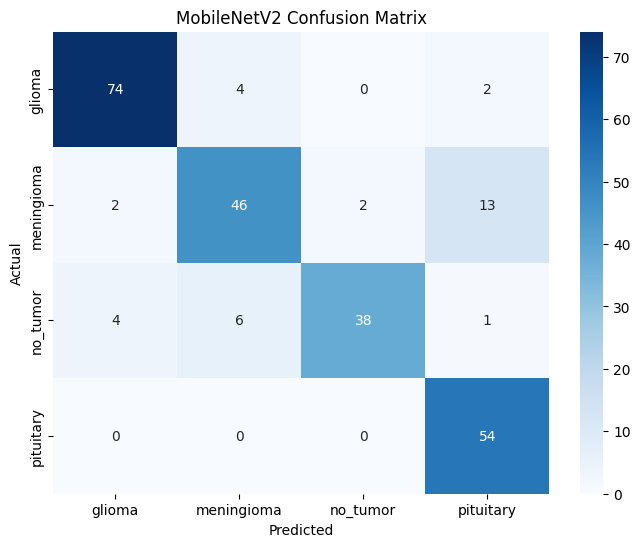

Classification Report:
               precision    recall  f1-score   support

      glioma       0.93      0.93      0.93        80
  meningioma       0.82      0.73      0.77        63
    no_tumor       0.95      0.78      0.85        49
   pituitary       0.77      1.00      0.87        54

    accuracy                           0.86       246
   macro avg       0.87      0.86      0.86       246
weighted avg       0.87      0.86      0.86       246



In [116]:
#Confusion Matrix + Classification Report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('MobileNetV2 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)

### ML Model - 4: Resnet 50

In [118]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Load base ResNet50 model without top layers
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base layers
for layer in base_model_resnet.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_labels), activation='softmax')(x)

# Define model
model_resnet = Model(inputs=base_model_resnet.input, outputs=predictions)
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet.summary()


94765736/94765736 [==============================] - 33s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [120]:
# Define callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop_resnet = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint_resnet = ModelCheckpoint("resnet_model.h5", save_best_only=True)

# Train model
history_resnet = model_resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop_resnet, checkpoint_resnet]
)


Epoch 1/10
53/53 [==============================] - ETA: 0s - loss: 1.3836 - accuracy: 0.3410

C:\Users\hp\anaconda3\envs\brain_mri\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


53/53 [==============================] - 145s 3s/step - loss: 1.3836 - accuracy: 0.3410 - val_loss: 1.2155 - val_accuracy: 0.5080
Epoch 2/10
53/53 [==============================] - 146s 3s/step - loss: 1.2507 - accuracy: 0.4283 - val_loss: 1.1613 - val_accuracy: 0.4960
Epoch 3/10
53/53 [==============================] - 147s 3s/step - loss: 1.2172 - accuracy: 0.4572 - val_loss: 1.1419 - val_accuracy: 0.5538
Epoch 4/10
53/53 [==============================] - 153s 3s/step - loss: 1.1829 - accuracy: 0.4808 - val_loss: 1.1030 - val_accuracy: 0.5538
Epoch 5/10
53/53 [==============================] - 153s 3s/step - loss: 1.1661 - accuracy: 0.4867 - val_loss: 1.0751 - val_accuracy: 0.5757
Epoch 6/10
53/53 [==============================] - 156s 3s/step - loss: 1.1481 - accuracy: 0.4973 - val_loss: 1.0699 - val_accuracy: 0.5737
Epoch 7/10
53/53 [==============================] - 157s 3s/step - loss: 1.1556 - accuracy: 0.5003 - val_loss: 1.0532 - val_accuracy: 0.6195
Epoch 8/10
53/53 [======

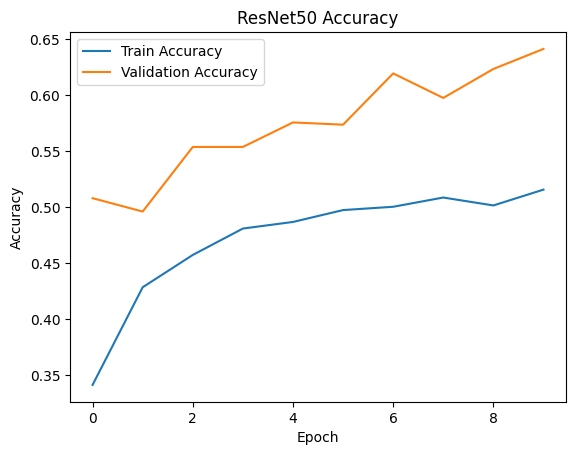

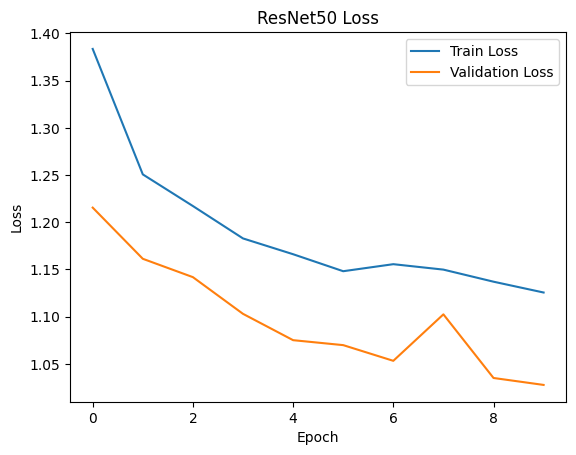

In [122]:
# Accuracy plot
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


8/8 [==============================] - 19s 2s/step


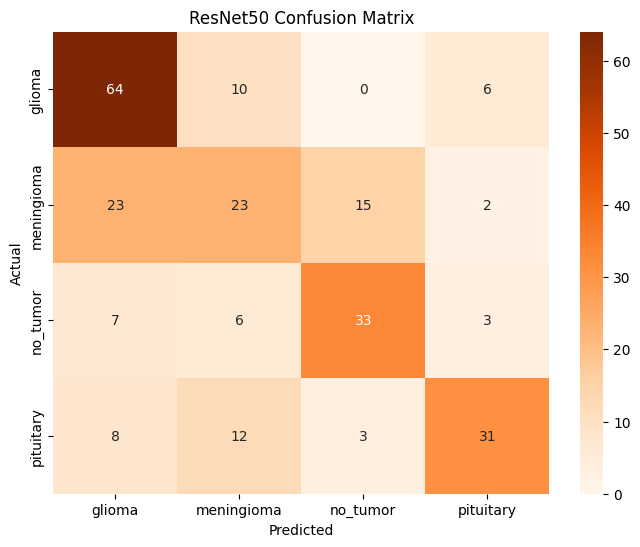

ResNet50 Classification Report:
               precision    recall  f1-score   support

      glioma       0.63      0.80      0.70        80
  meningioma       0.45      0.37      0.40        63
    no_tumor       0.65      0.67      0.66        49
   pituitary       0.74      0.57      0.65        54

    accuracy                           0.61       246
   macro avg       0.62      0.60      0.60       246
weighted avg       0.61      0.61      0.61       246



In [124]:
#Confusion Matrix & Classification Report

# Predictions
y_true_resnet = test_generator.classes
y_pred_probs_resnet = model_resnet.predict(test_generator)
y_pred_resnet = np.argmax(y_pred_probs_resnet, axis=1)

# Confusion Matrix
cm_resnet = confusion_matrix(y_true_resnet, y_pred_resnet)
plt.figure(figsize=(8,6))
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Oranges',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('ResNet50 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report_resnet = classification_report(y_true_resnet, y_pred_resnet, target_names=class_labels)
print("ResNet50 Classification Report:\n", report_resnet)

Answer Here.

Answer Here.

Answer Here.

### 1. Which ML model did you choose from the above created models as your final prediction model and why?

i will use MobileNetV2 as final model as it is giving the highest accuracy amongst all

In [ ]:
# Save the File

In [ ]:
# Load the File and predict unseen data.

## **Conclusion**

This project successfully demonstrates the application of deep learning techniques—both custom CNN and transfer learning models—for classifying brain MRI images into four categories: Glioma, Meningioma, Pituitary, and No Tumor.

After preprocessing the data with resizing, normalization, and augmentation, we trained a custom CNN and compared it with VGG16, ResNet50, and MobileNetV2. Among them, MobileNetV2 achieved the highest accuracy (~86%), outperforming the others in terms of both performance and efficiency. Fine-tuning further improved its accuracy, making it the most suitable model for deployment. The best-performing model was then integrated into a Streamlit application, allowing real-time predictions on uploaded MRI images. This end-to-end pipeline demonstrates the effective application of deep learning in medical image classification and lays the groundwork for further enhancements like Grad-CAM explainability, model ensembling, and clinical integration.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***